Index(['user', 'activity', 'timestamp', 'x-axis', 'y-axis', 'z-axis'], dtype='object')
Metrics for KNN:
Accuracy: 0.63
Precision: 0.58
Recall: 0.63

Metrics for Decision Tree:
Accuracy: 0.54
Precision: 0.54
Recall: 0.54



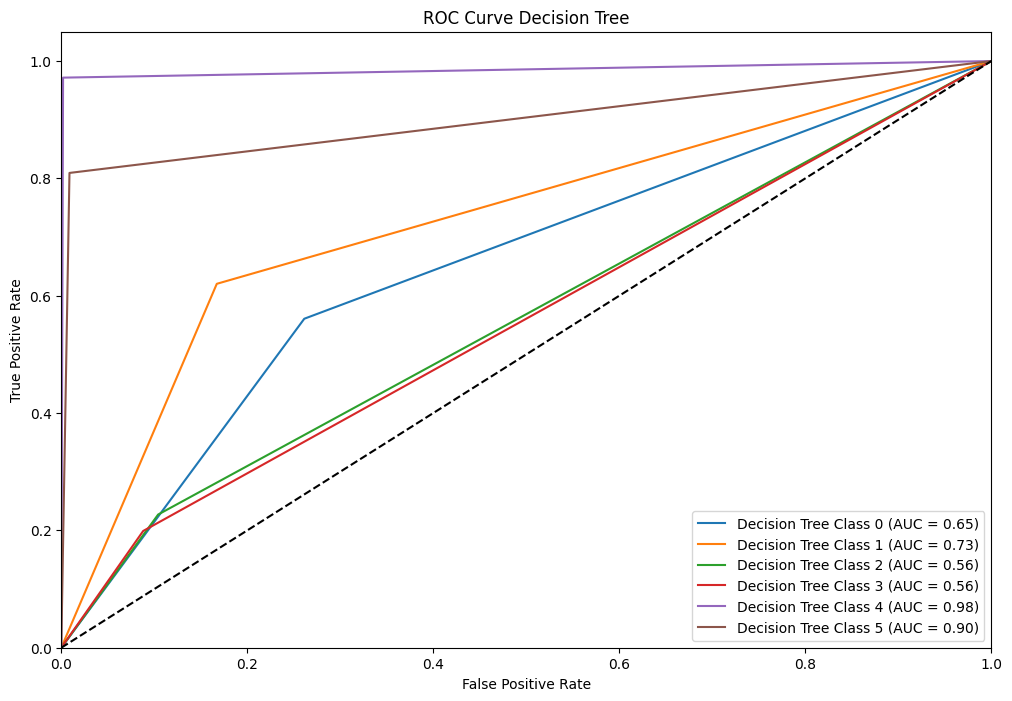

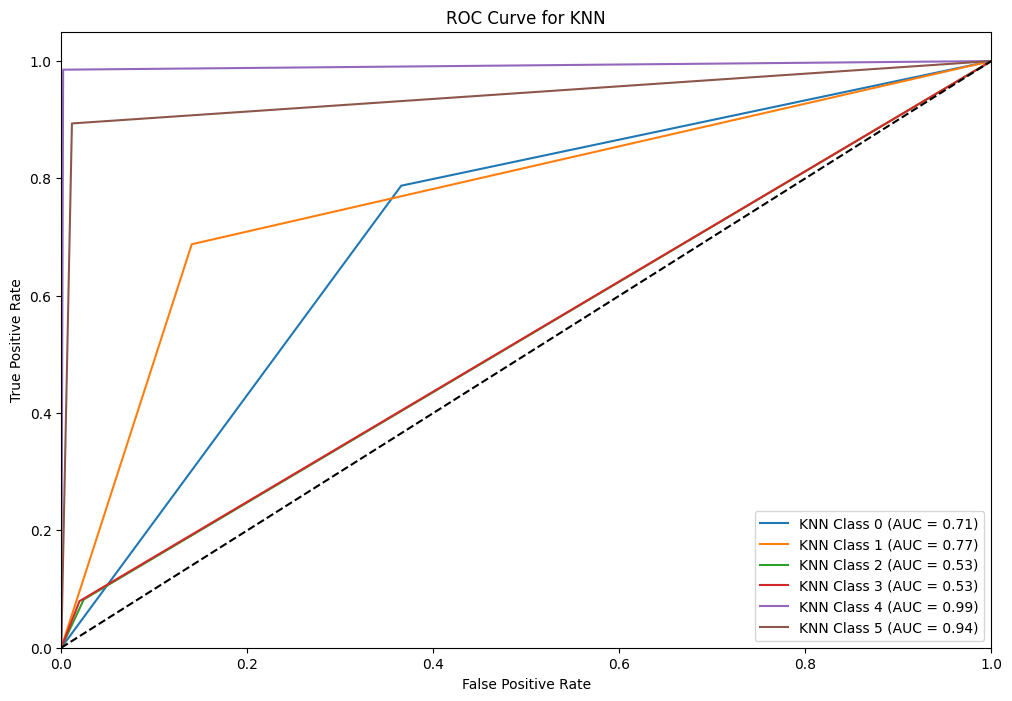

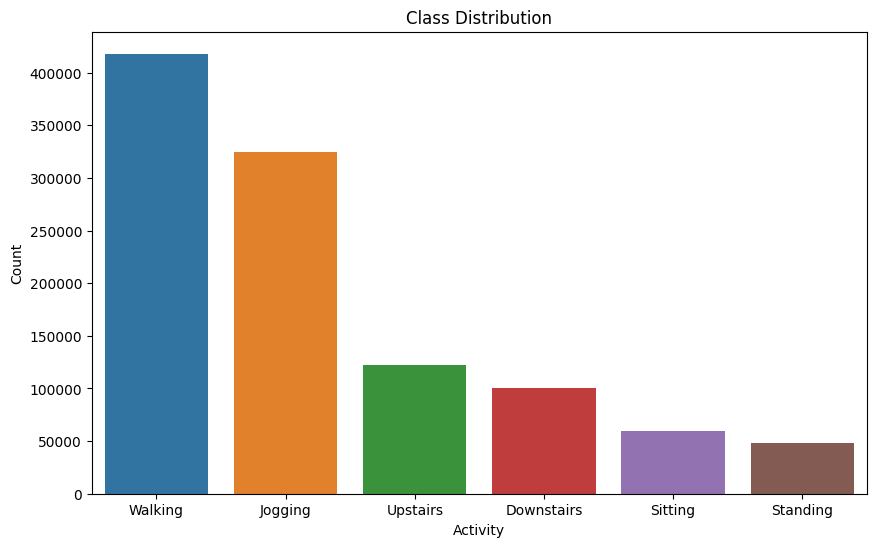

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


df = pd.read_csv('/kaggle/input/human-activity-recognition/time_series_data_human_activities.csv')
print(df.columns)

X = df[['x-axis', 'y-axis', 'z-axis']]
y = df['activity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


k = 20  
knn_model = knn(n_neighbors=k)
dt_model = DecisionTreeClassifier()

knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

def print_metrics(y_true, y_pred, model_name):
    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")
    print()

print_metrics(y_test, y_pred_knn, 'KNN')
print_metrics(y_test, y_pred_dt, 'Decision Tree')

y_bin_test = label_binarize(y_test, classes=df['activity'].unique())
y_bin_pred_knn = label_binarize(y_pred_knn, classes=df['activity'].unique())
y_bin_pred_dt = label_binarize(y_pred_dt, classes=df['activity'].unique())

fpr_knn = {}
tpr_knn = {}
roc_auc_knn = {}
fpr_dt = {}
tpr_dt = {}
roc_auc_dt = {}

for i in range(y_bin_test.shape[1]):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_bin_test[:, i], y_bin_pred_knn[:, i])
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_bin_test[:, i], y_bin_pred_dt[:, i])
    roc_auc_knn[i] = auc(fpr_knn[i], tpr_knn[i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

plt.figure(figsize=(12, 8))
for i in range(y_bin_test.shape[1]):
   plt.plot(fpr_dt[i], tpr_dt[i], label=f'Decision Tree Class {i} (AUC = {roc_auc_dt[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 8))
for i in range(y_bin_test.shape[1]):
    plt.plot(fpr_knn[i], tpr_knn[i], label=f'KNN Class {i} (AUC = {roc_auc_knn[i]:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc='lower right')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='activity',data=df)
plt.title('Class Distribution')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()


In [3]:

print(f"Cross Validation KNN : {cross_val_score(knn(n_neighbors=k), X, y, cv=5).mean()}")
print(f"Cross Validation DTR : {cross_val_score(DecisionTreeClassifier(), X, y, cv=5).mean()}")

Cross Validation KNN : 0.5351533630722791
Cross Validation DTR : 0.4157753463896432
